<a href="https://colab.research.google.com/github/Iswarya2003/stock_market_prediction/blob/main/STOCKMARKET.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

In [ ]:
dataset_train = pd.read_csv('NSE-TATAGLOBAL.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 2035):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
62/62 [==============================] - 14s 114ms/step - loss: 0.0105
Epoch 2/100
62/62 [==============================] - 7s 115ms/step - loss: 0.0031
Epoch 3/100
62/62 [==============================] - 7s 114ms/step - loss: 0.0026
Epoch 4/100
62/62 [==============================] - 7s 112ms/step - loss: 0.0023
Epoch 5/100
62/62 [==============================] - 7s 110ms/step - loss: 0.0024
Epoch 6/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0023
Epoch 7/100
62/62 [==============================] - 8s 130ms/step - loss: 0.0024
Epoch 8/100
62/62 [==============================] - 7s 111ms/step - loss: 0.0021
Epoch 9/100
62/62 [==============================] - 7s 112ms/step - loss: 0.0020
Epoch 10/100
62/62 [==============================] - 7s 113ms/step - loss: 0.0027
Epoch 11/100
62/62 [==============================] - 7s 115ms/step - loss: 0.0023
Epoch 12/100
62/62 [==============================] - 7s 112ms/step - loss: 0.0018
Epoch 13/100

In [ ]:
from google.colab import files
files.upload()

Saving tatatest.csv to tatatest.csv


{'tatatest.csv': b'Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)\n2018-10-24,220.1,221.25,217.05,219.55,219.8,2171956,4771.34\n2018-10-23,221.1,222.2,214.75,219.55,218.3,1416279,3092.15\n2018-10-22,229.45,231.6,222,223.05,223.25,3529711,8028.37\n2018-10-19,230.3,232.7,225.5,227.75,227.2,1527904,3490.78\n2018-10-17,237.7,240.8,229.45,231.3,231.1,2945914,6961.65\n2018-10-16,237.1,237.7,233.05,234.4,235.45,1723113,4052.25\n2018-10-15,229.7,237,226.8,234.8,234.9,1224339,2845.68\n2018-10-12,226.25,232.35,225.5,228.7,229.1,1165527,2675.91\n2018-10-11,215,229.7,215,225.6,224.6,1293881,2890.85\n2018-10-10,215,229.65,215,228.25,228.4,2919278,6557.95\n2018-10-09,215.5,219.15,209.6,215,216.5,1844462,3940.7\n2018-10-08,208,222.25,206.85,216,215.15,4642146,10062.83\n2018-10-05,217,218.6,205.9,210.25,209.2,3519515,7407.06\n2018-10-04,223.5,227.8,216.15,217.25,218.2,1728786,3815.79\n2018-10-03,230,237.5,225.75,226.45,227.6,1708590,3960.27\n2018-10-01,234.55,234.6,221.05,230.3,230

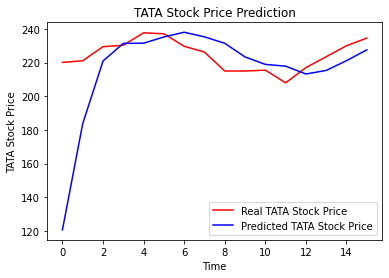

In [8]:
dataset_test = pd.read_csv('tatatest.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real TATA Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted TATA Stock Price')
plt.title('TATA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TATA Stock Price')
plt.legend()
plt.show()